# Abstract:

### There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price

# Problem Statement:

###  Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

# Dataset Information:

### battery_power=Total energy a battery can store in one time measured in mAh
### clock_speed=The speed at which microprocessor executes instructions
### fc=Front Camera megapixels
### int_memory=Internal Memory in Gigabytes
### m_dep=Mobile Depth in cm
### mobile_wt=Weight of the mobile phone
### n_cores=Number of cores of a processor
### pc=Primary Camera megapixels
### px_height=Pixel Resolution Height
### px_width=Pixel Resolution Width
### ram=Random Access Memory in MegaBytes
### sc_h=Screen Height of mobile in cm
### sc_w=Screen Width of mobile in cm
### talk_time=The longest time that a single battery charge will last when you are
### price_range=This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import the required packages

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Mobile_data.csv")  ## loading the dataset

In [3]:
df.head() # reading thw last five rows

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,NaN,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021.0,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563.0,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615.0,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821.0,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [4]:
df.dtypes # reading the data types

battery_power    float64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [5]:
df.isnull().sum() # checking the null values

battery_power    1
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [6]:
# there is one null value in battery_power lets replace with median 

In [7]:
 df['battery_power'].fillna(df['battery_power'].median(),inplace=True)


In [8]:
df.shape # reading the number of rows and columns

(2000, 15)

In [9]:
df.info() #printing all columns ,non null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 234.5 KB


In [10]:
df.describe(include='all') # returns the statistical summary  for  CATEGORICAL DATA


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.711000,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.328734,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,852.000000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1227.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [11]:
df.describe() # returns the statistical summary  for NUMERICAL DATA


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.711000,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.328734,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,852.000000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1227.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [12]:
df.groupby(["price_range"]).count()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
price_range,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500


<AxesSubplot:>

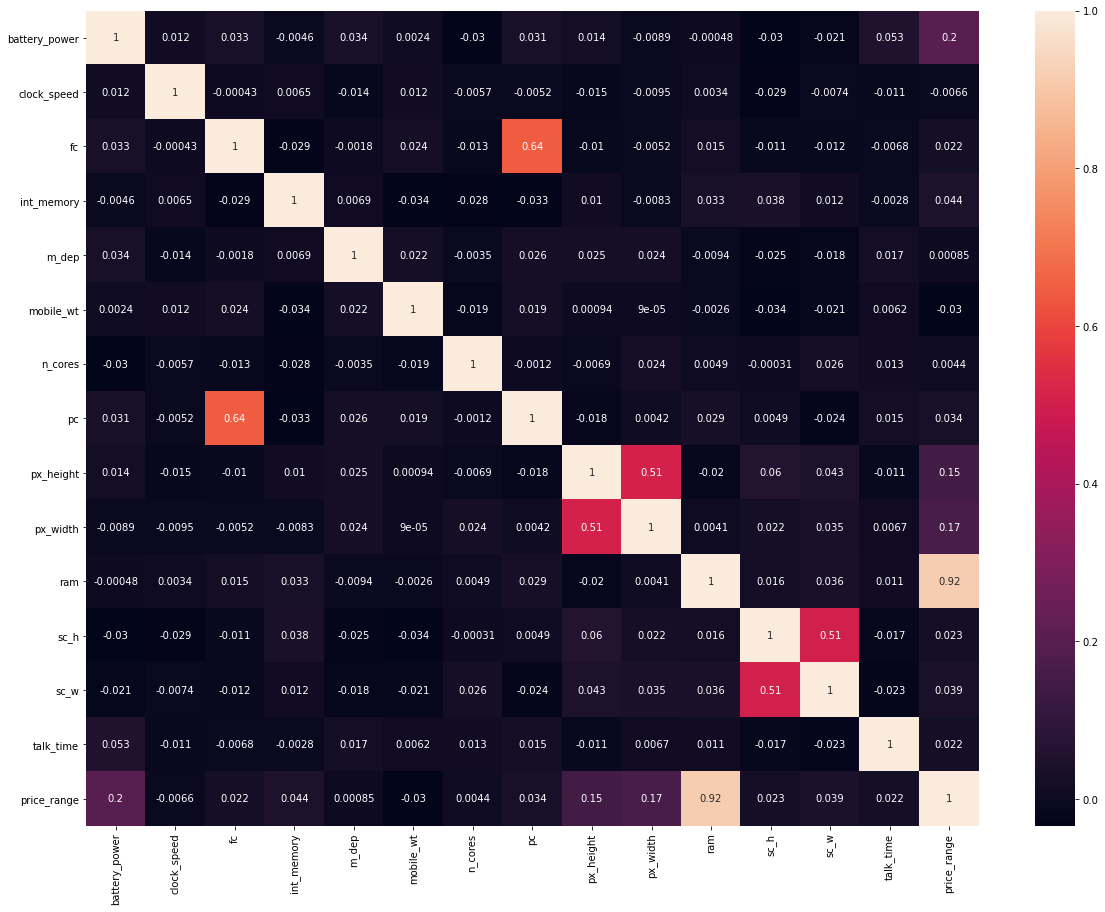

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)  # finding the correlation by using heat map

In [14]:
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


# Training Data and Testing Data Split

In [15]:

x=df.drop(labels="price_range" , axis=1)
y=df["price_range"]
x.head()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1227.0,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021.0,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563.0,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615.0,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821.0,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


# StandardScaler

In [16]:
df_m=df.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = [["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"]]
for feature in features:
    df_m[feature] = scaler.fit_transform(df_m[feature])

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [18]:
NNH = KNeighborsClassifier(n_neighbors= 21 ,metric='euclidean' )

In [19]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [20]:
y_pred = NNH.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9383333333333334


# MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

In [23]:
X=df.drop(labels="price_range" , axis=1)
Y=df["price_range"]
X.head()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1227.0,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021.0,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563.0,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615.0,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821.0,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=0)

In [25]:
NNHH = KNeighborsClassifier(n_neighbors= 49 ,metric='euclidean' )


In [26]:
NNHH.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=49)

In [27]:
Y_pred = NNHH.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.9233333333333333
